In [1]:
%reload_kedro
import pandas as pd
import numpy as np
import seaborn as sns

2022-11-17 10:30:25,105 - kedro.ipython - INFO - No path argument was provided. Using: /Users/michaelb/Projects/python/swsp
2022-11-17 10:30:25,255 - kedro.ipython - INFO - Kedro project swsp
2022-11-17 10:30:25,255 - kedro.ipython - INFO - Defined global variable 'context', 'session', 'catalog' and 'pipelines'


In [2]:
patient_loader = catalog.datasets.patient_int__PartitionedDataSet.load()

In [3]:
# for ds, loader_fn in feature_loader.items()

In [4]:
cat_vocab = {"0": "amusement", "1": "baseline", "2": "stress"}

In [5]:
ps = patient_loader["S2_feats_4"]()
temp_ps = ps.iloc[:, -3:]
ps = ps.filter(regex="EDA")
ps = ps.join(temp_ps, on=ps.index)
ps = ps.rename(cat_vocab, axis=1)
ps

,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,EDA_smna_std,EDA_smna_min,EDA_smna_max,EDA_tonic_mean,EDA_tonic_std,EDA_tonic_min,EDA_tonic_max,amusement,baseline,stress
0,2.247876,1.112076,0.367977,4.459367,1.592308,2.645333,3.096905e-08,17.418821,0.608263,1.212010,-1.213173,2.554750,0,1,0
1,1.781323,1.203991,0.232625,4.459367,1.347750,2.666659,3.096905e-08,17.418821,0.731985,1.171627,-1.213173,2.477276,0,1,0
2,1.173169,1.285422,0.006950,4.459367,0.752335,1.958546,3.096905e-08,17.418821,1.110242,1.112268,-1.213173,2.037179,0,1,0
3,0.311656,0.278650,0.006950,1.303071,0.198576,0.413802,3.309990e-08,2.788862,1.598995,0.350355,0.959752,2.037179,0,1,0
4,0.163826,0.110277,0.006950,0.369298,0.118080,0.237575,2.787285e-08,1.300810,1.342085,0.405980,0.945946,2.037179,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.058712,0.105862,0.000680,0.438980,0.044785,0.183113,6.213036e-08,1.686983,-0.505699,0.096995,-0.799950,-0.403625,1,0,0
130,0.028322,0.029154,0.000680,0.112613,0.021319,0.061843,3.246032e-08,0.500290,-0.475703,0.025890,-0.504951,-0.403625,1,0,0
131,0.036776,0.031772,0.000680,0.112613,0.028537,0.074997,3.246032e-08,0.500290,-0.483089,0.017064,-0.504951,-0.444507,1,0,0
132,0.064055,0.049440,0.000902,0.212197,0.050079,0.107080,3.246032e-08,0.526342,-0.478832,0.018428,-0.504951,-0.443658,1,0,0


In [6]:
ps.columns

Index(['EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max',
       'EDA_smna_mean', 'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max',
       'EDA_tonic_mean', 'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max',
       'amusement', 'baseline', 'stress'],
      dtype='object')

In [7]:
phasic = ps.iloc[:, [0, -1, -2, -3]]

phasic_stress = pd.concat([phasic[phasic["amusement"] == 1], phasic[phasic["stress"] == 1]])
phasic_base = phasic[phasic["baseline"] == 1]

phasic_stress_mean = phasic_stress["EDA_phasic_mean"].median()
phasic_base_mean = phasic_base["EDA_phasic_mean"].median()

phasic_base_mean

0.0088145221521696

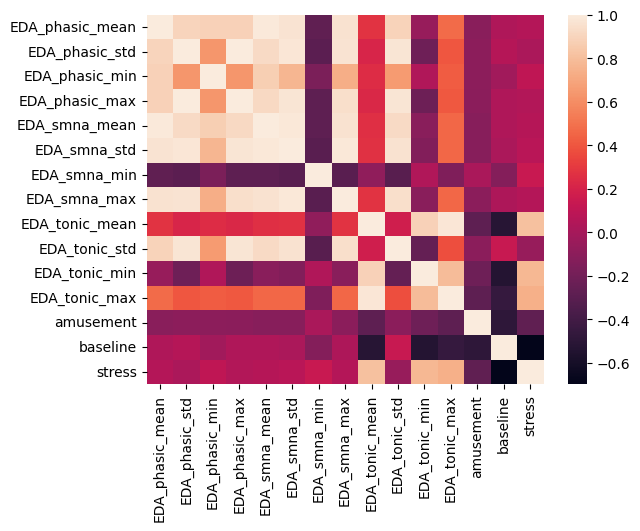

In [8]:
sns.heatmap(ps.corr())

In [96]:
base_amusement = ps[ps["amusement"] == 1]["EDA_phasic_mean"].median()
base_amusement_d = ps[ps["amusement"] == 1]["EDA_phasic_mean"].std()

In [50]:
base_baseline = ps[ps["baseline"] == 1]["EDA_phasic_mean"].median()
base_baseline_d = ps[ps["baseline"] == 1]["EDA_phasic_mean"].std()

In [51]:
base_stress = ps[ps["stress"] == 1]["EDA_phasic_mean"].median()
base_stress_d = ps[ps["stress"] == 1]["EDA_phasic_mean"].std()

In [129]:
def hyst_thresh(data: pd.DataFrame) -> np.ndarray:
    p = data["EDA_phasic_mean"].to_numpy()
    k = data["EDA_phasic_min"].to_numpy()
    m = data["EDA_phasic_max"].to_numpy()
    low_values = p <= (k * p)
    high_values = p >= (m * p)
    known_values = high_values | low_values
    known_idx = np.nonzero(known_values)[0]
    acc = np.cumsum(known_values)
    result = low_values[known_idx[acc - 1]]
    if not acc[0]:
        result[0] = False
    result = np.int8(result)
    return result

In [130]:
hyst_thresh(ps)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int8)